In [1]:
#importing in and setting directory
import os
import pandas as pd
# Define the base directory for the data
root_dir_absolute=r'/home/abk397/cellbox_torch'
os.chdir(root_dir_absolute)
print(os.getcwd())


/home/abk397/cellbox_torch


In [ ]:
# Define directory containing CPPA TSV files
summary_dir_rel = "Abdullah_kuziez/online_data/CPPA_data/P0_P1_v1.0_treament_sum/CPPA_v1.0_Cell_line_perturbed_responses_p0_p1_TreatmentSummary"
base_dir_rel= "Abdullah_kuziez/online_data/CPPA_data/P0_P1_v1.0/CPPA_v1.0_Cell_line_perturbed_responses_p0_p1_RPPA"

sum_path=os.path.join(root_dir_absolute,summary_dir_rel)
base_path=os.path.join(root_dir_absolute,base_dir_rel)

# List all .tsv files in the base directory
data_files = [
    os.path.join(base_path, f)
    for f in os.listdir(base_path)
    if f.endswith('.tsv')
]

sum_files= [
    os.path.join(sum_path, f)
    for f in os.listdir(sum_path)
    if f.endswith('.tsv')
]
print(f"Found {len(data_files)} TSV files in: {base_path}")
print(f"Found {len(sum_files)} TSV files in: {sum_path}")

Found 64 TSV files in: /home/abk397/cellbox_torch/Abdullah_kuziez/online_data/CPPA_data/P0_P1_v1.0/CPPA_v1.0_Cell_line_perturbed_responses_p0_p1_RPPA
Found 64 TSV files in: /home/abk397/cellbox_torch/Abdullah_kuziez/online_data/CPPA_data/P0_P1_v1.0_treament_sum/CPPA_v1.0_Cell_line_perturbed_responses_p0_p1_TreatmentSummary


In [3]:
#loading in and checking the first few rows of the first file

df_data = pd.read_csv(data_files[0], sep='\t')
df_sum = pd.read_csv(sum_files[0], sep='\t')


#loading in and checking the first few rows of the first file


In [ ]:
# Read and concatenate all data files into one dataframe, skipping files with errors
dataframes = []
for f in data_files:
    try:
        df = pd.read_csv(f, sep='\t')
        dataframes.append(df)
    except Exception as e:
        print(f"Skipping file {f} due to error: {e}")
df_data_all = pd.concat(dataframes, ignore_index=True)

# Read and concatenate all summary files into one dataframe, skipping files with errors
sum_dataframes = []
for f in sum_files:
    try:
        df = pd.read_csv(f, sep='\t')
        sum_dataframes.append(df)
    except Exception as e:
        print(f"Skipping file {f} due to error: {e}")
df_sum_all = pd.concat(sum_dataframes, ignore_index=True)

merged_df = pd.merge(df_sum_all, df_data_all, on='UID', how='inner')

merged_df.sort_values(by=['cell_line_name','compound_name_1','compound_name_2'], inplace=True)


In [ ]:
unique_names=list(set(merged_df['cell_line_name']))
unique_drugs = 1
unique_drugs=list(
    set(
        merged_df['compound_name_1'].dropna()
    ).union(
        merged_df['compound_name_2'].dropna()
    ).union(
        merged_df['compound_name_3'].dropna()
    ).union(
        merged_df['compound_name_4'].dropna()
    )
)

unique_proteins=merged_df.columns.tolist()



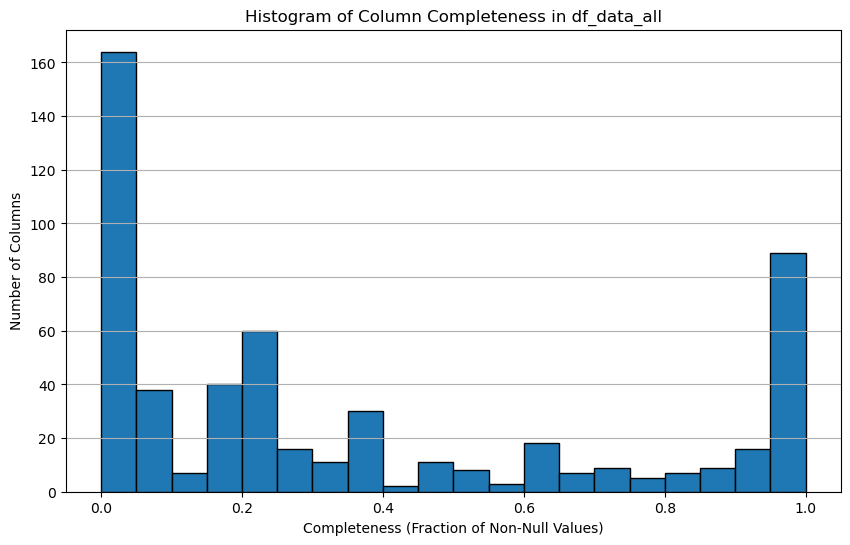

In [7]:
import matplotlib.pyplot as plt

# Calculate completeness (fraction of non-null values) for each column
completeness = df_data_all.notnull().mean()

# Plot histogram of completeness
plt.figure(figsize=(10, 6))
plt.hist(completeness, bins=20, edgecolor='black')
plt.xlabel('Completeness (Fraction of Non-Null Values)')
plt.ylabel('Number of Columns')
plt.title('Histogram of Column Completeness in df_data_all')
plt.grid(axis='y')
plt.show()
